<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ProbabilityTheory/%D0%93%D0%BB%D0%B0%D0%B2%D0%B0_12_%D0%93%D0%B0%D1%83%D1%81%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D0%BF%D1%80%D0%BE%D1%86%D0%B5%D1%81%D1%81%D1%8B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Глава 12. Гауссовские процессы

## Введение в Гауссовские процессы

### Определение

Гауссовский процесс (ГП) — это случайный процесс, в котором любые конечные подмножества случайных переменных имеют многомерное нормальное распределение. Этот процесс широко используется в статистике, машинном обучении и различных областях прикладной науки.

Гауссовский процесс можно формально описать следующим образом:

Пусть $\mathcal{X}$ — входное пространство, тогда для любого конечного набора точек $x_1, x_2, \ldots, x_n \in \mathcal{X}$ соответствующий набор случайных величин $f(x_1), f(x_2), \ldots, f(x_n)$ имеет многомерное нормальное распределение:

$$
\begin{bmatrix}
f(x_1) \\
f(x_2) \\
\vdots \\
f(x_n)
\end{bmatrix}
\sim \mathcal{N}(\mu, \Sigma)
$$

где:

- $\mu = \begin{bmatrix} m(x_1) \\ m(x_2) \\ \vdots \\ m(x_n) \end{bmatrix}$ — вектор математических ожиданий,
- $\Sigma$ — ковариационная матрица, элементы которой задаются функцией ковариации $k(x_i, x_j)$, которая описывает, насколько сильно значения функции $f$ в точках $x_i$ и $x_j$ коррелируют друг с другом.

### Функция ковариации

Функция ковариации $k(x_i, x_j)$ играет ключевую роль в определении свойств гауссовского процесса. Примеры функций ковариации:

1. **Постоянная функция**:
   $$
   k(x_i, x_j) = \sigma^2
   $$
   где $\sigma^2$ — постоянная, отвечающая за дисперсию.

2. **Радиальная базисная функция (RBF)** или **экспоненциальная функция**:
   $$
   k(x_i, x_j) = \sigma^2 \exp\left(-\frac{(x_i - x_j)^2}{2\ell^2}\right)
   $$
   где $\ell$ — длина шкалы, определяющая, как быстро затухает корреляция.

3. **Математическая функция**:
   $$
   k(x_i, x_j) = \sigma^2 \left(1 + \frac{(x_i - x_j)^2}{2\ell^2}\right) \exp\left(-\frac{(x_i - x_j)^2}{2\ell^2}\right)
   $$

Эти функции описывают различные свойства и структуру корреляции в данных.

## Применение Гауссовских процессов для задач регрессии

### Основная идея

Гауссовские процессы особенно полезны в задачах регрессии, поскольку они могут использоваться для моделирования неопределенности предсказаний. В рамках ГП регрессионная модель предполагает, что целевая функция $f$ имеет гауссовское распределение.

### Регрессионная модель

Рассмотрим набор обучающих данных $\{(x_i, y_i)\}_{i=1}^n$, где $y_i = f(x_i) + \epsilon_i$, $\epsilon_i \sim \mathcal{N}(0, \sigma_n^2)$ — случайная ошибка. Предполагается, что $f(x)$ имеет распределение Гауссовского процесса с нулевым средним и ковариацией, заданной функцией $k(x, x')$.

#### Формулировка

Пусть $X = \begin{bmatrix} x_1 & x_2 & \ldots & x_n \end{bmatrix}^T$ — матрица входных данных, тогда:

$$
Y = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} \sim \mathcal{N}(0, K + \sigma_n^2 I)
$$

где $K$ — ковариационная матрица, элементы которой $K_{ij} = k(x_i, x_j)$, а $I$ — единичная матрица.

### Предсказание

Для новых точек $x_*$ предсказание $y_*$ также будет нормальным распределением:

$$
\begin{bmatrix}
Y \\
Y_*
\end{bmatrix}
\sim \mathcal{N}\left(0, \begin{bmatrix}
K + \sigma_n^2 I & K_* \\
K_*^T & K_{**}
\end{bmatrix}\right)
$$

где:

- $K_*$ — ковариация между обучающими и тестовыми точками $K_{*ij} = k(x_i, x_{*j})$,
- $K_{**}$ — ковариация тестовых точек $K_{**ij} = k(x_{*i}, x_{*j})$.

#### Результат

Распределение предсказаний будет:

$$
y_* \sim \mathcal{N}(\mu_*, \sigma_*^2)
$$

где:

$$
\mu_* = K_*^T (K + \sigma_n^2 I)^{-1} Y
$$

$$
\sigma_*^2 = K_{**} - K_*^T (K + \sigma_n^2 I)^{-1} K_*
$$

### Пример

Рассмотрим следующий набор данных:

- Точки: $x = [1, 2, 3]$
- Значения: $y = [2.5, 3.0, 4.5]$

Используем радиальную базисную функцию в качестве ковариации:

$$
k(x_i, x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2}\right)
$$

1. **Ковариационная матрица $K$**:

$$
K = \begin{bmatrix}
1 & \exp(-\frac{1}{2}) & \exp(-1) \\
\exp(-\frac{1}{2}) & 1 & \exp(-\frac{1}{2}) \\
\exp(-1) & \exp(-\frac{1}{2}) & 1
\end{bmatrix} \approx \begin{bmatrix}
1 & 0.6065 & 0.3679 \\
0.6065 & 1 & 0.6065 \\
0.3679 & 0.6065 & 1
\end{bmatrix}
$$

2. **Предсказания для точки $x_* = 2.5$**:

   - Рассчитаем $K_*$ и $K_{**}$:

$$
K_* = \begin{bmatrix}
k(1, 2.5) \\
k(2, 2.5) \\
k(3, 2.5)
\end{bmatrix} = \begin{bmatrix}
\exp(-\frac{(1 - 2.5)^2}{2}) \\
\exp(-\frac{(2 - 2.5)^2}{2}) \\
\exp(-\frac{(3 - 2.5)^2}{2})
\end{bmatrix} = \begin{bmatrix}
0.6065 \\
0.7788 \\
0.6065
\end{bmatrix}
$$

$$
K_{**} = k(2.5, 2.5) = 1
$$

3. **Рассчитываем $\mu_*$ и $\sigma_*^2$**:

Используя формулы выше и некоторую шумовую дисперсию $\sigma_n^2 = 0.1$:

$$
\mu_* = K_*^T (K + 0.1 I)^{-1} Y
$$

4. Подсчитываем матрицу $K + 0.1 I$:

$$
K + 0.1 I \approx \begin{bmatrix}
1.1 & 0.6065 & 0.3679 \\
0.6065 & 1.1 & 0.6065 \\
0.3679 & 0.6065 & 1.1
\end{bmatrix}
$$

5. Находим обратную матрицу и затем подставляем её в формулу для $\mu_*$ и $\sigma_*^2$.

## Оптимизация гиперпараметров с использованием Гауссовских процессов

### Основная идея

Гиперпараметры — это параметры, определяющие структуру модели, которые не обучаются в процессе. Оптимизация гиперпараметров позволяет находить наиболее эффективные значения для улучшения модели.

### Подходы к оптимизации

1. **Методы градиент

ного спуска**: При использовании ГП можно формулировать задачу как оптимизацию функции, где гиперпараметры являются переменными.

2. **Байесовская оптимизация**: Использует Гауссовские процессы для моделирования функции потерь в зависимости от гиперпараметров и делает выбор новых гиперпараметров на основе имеющихся данных.

### Байесовская оптимизация

#### Формулировка

Пусть $\theta$ — вектор гиперпараметров, $f(\theta)$ — целевая функция, которую мы хотим оптимизировать. Мы хотим максимизировать $f(\theta)$ в пределах некоторого диапазона значений гиперпараметров.

1. **Моделирование функции потерь**:

$$
f(\theta) \sim \mathcal{GP}(m(\theta), k(\theta, \theta'))
$$

где $m(\theta)$ — среднее, $k(\theta, \theta')$ — функция ковариации.

2. **Активное обучение**: На каждом шаге мы выбираем следующую точку гиперпараметров, основываясь на апостериорном распределении.

### Пример оптимизации

Рассмотрим оптимизацию гиперпараметров для модели SVM, где гиперпараметрами будут $C$ и $\gamma$.

1. **Обозначим целевую функцию**:

$$
f(C, \gamma) = \text{точность модели на валидационном наборе}
$$

2. **Обозначим диапазоны гиперпараметров**:

- $C \in [0.1, 10]$
- $\gamma \in [0.01, 1]$

3. **Сначала проводим несколько пробных запусков**:

- $(C_1, \gamma_1) = (0.5, 0.1)$ -> $f(C_1, \gamma_1) = 0.85$
- $(C_2, \gamma_2) = (2.0, 0.5)$ -> $f(C_2, \gamma_2) = 0.90$
- $(C_3, \gamma_3) = (1.0, 0.3)$ -> $f(C_3, \gamma_3) = 0.88$

4. **Построение Гауссовского процесса**:

На основе полученных значений строим ГП для $f(C, \gamma)$.

5. **Оптимизация**:

Используя апостериорное распределение, выбираем следующий набор гиперпараметров, который, по нашему предположению, даст наилучший результат.

### Заключение

Гауссовские процессы — мощный инструмент для решения задач регрессии и оптимизации гиперпараметров. Их способность моделировать неопределенность и предоставлять вероятностные предсказания делает их незаменимыми в машинном обучении и статистике. В будущем их применение будет расширяться благодаря новым методам и алгоритмам.

## Числовые примеры

1. **Регрессия**:

   Для точки $x = 2.5$ с входными данными $x = [1, 2, 3]$ и значениями $y = [2.5, 3.0, 4.5]$:

   - Ковариационная матрица $K$ была вычислена как:
   $$
   K \approx \begin{bmatrix}
   1 & 0.6065 & 0.3679 \\
   0.6065 & 1 & 0.6065 \\
   0.3679 & 0.6065 & 1
   \end{bmatrix}
   $$

   - Для предсказания:
   $$
   \mu_* = 3.2, \quad \sigma_*^2 = 0.4
   $$
   Предсказание: $y_* = 3.2 \pm \sqrt{0.4}$.

2. **Оптимизация гиперпараметров**:

   Для SVM с гиперпараметрами $C$ и $\gamma$:

   - $(C_1, \gamma_1) = (0.5, 0.1)$ -> точность = 0.85
   - $(C_2, \gamma_2) = (2.0, 0.5)$ -> точность = 0.90
   - $(C_3, \gamma_3) = (1.0, 0.3)$ -> точность = 0.88

   Выбор наилучшего гиперпараметра: $C = 2.0, \gamma = 0.5$.

Таким образом, Гауссовские процессы обеспечивают надежный метод для выполнения сложных регрессионных задач и оптимизации гиперпараметров, позволяя получать более точные и обоснованные предсказания.


# Задачи

### Задача 1: Предсказание с использованием Гауссовского процесса

**Условие:**
Рассмотрим обучающий набор данных, состоящий из следующих точек:
- $x = [1, 2, 3]$
- $y = [2.5, 3.0, 4.5]$

Используя радиальную базисную функцию (RBF) в качестве функции ковариации $k(x_i, x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2\sigma^2}\right)$, где $\sigma = 1$, найдите предсказанное значение функции $f(x_*)$ для точки $x_* = 2.5$.

**Шаг 1: Вычисление ковариационной матрицы $K$**

Сначала необходимо рассчитать ковариационную матрицу для точек $x$ и для точки $x_*$.

- Для $K$ (обучающие точки):
$$
K = \begin{bmatrix}
k(1, 1) & k(1, 2) & k(1, 3) \\
k(2, 1) & k(2, 2) & k(2, 3) \\
k(3, 1) & k(3, 2) & k(3, 3)
\end{bmatrix}
$$

Вычислим значения:
- $k(1, 1) = \exp\left(-\frac{(1 - 1)^2}{2 \cdot 1^2}\right) = 1$
- $k(1, 2) = \exp\left(-\frac{(1 - 2)^2}{2 \cdot 1^2}\right) = \exp(-0.5) \approx 0.6065$
- $k(1, 3) = \exp\left(-\frac{(1 - 3)^2}{2 \cdot 1^2}\right) = \exp(-2) \approx 0.1353$
- $k(2, 1) = k(1, 2) = 0.6065$
- $k(2, 2) = 1$
- $k(2, 3) = \exp(-0.5) \approx 0.6065$
- $k(3, 1) = k(1, 3) \approx 0.1353$
- $k(3, 2) = k(2, 3) \approx 0.6065$
- $k(3, 3) = 1$

Итак, ковариационная матрица $K$ будет:
$$
K = \begin{bmatrix}
1 & 0.6065 & 0.1353 \\
0.6065 & 1 & 0.6065 \\
0.1353 & 0.6065 & 1
\end{bmatrix}
$$

**Шаг 2: Вычисление вектора ковариаций $k_*$**

Теперь рассчитаем вектор ковариаций между обучающими точками и точкой $x_* = 2.5$:

$$
k_* = \begin{bmatrix}
k(1, 2.5) \\
k(2, 2.5) \\
k(3, 2.5)
\end{bmatrix}
$$

Вычислим значения:
- $k(1, 2.5) = \exp\left(-\frac{(1 - 2.5)^2}{2}\right) = \exp(-1.125) \approx 0.3247$
- $k(2, 2.5) = \exp\left(-\frac{(2 - 2.5)^2}{2}\right) = \exp(-0.125) \approx 0.8825$
- $k(3, 2.5) = \exp\left(-\frac{(3 - 2.5)^2}{2}\right) = \exp(-0.125) \approx 0.8825$

Итак, вектор ковариаций будет:
$$
k_* = \begin{bmatrix}
0.3247 \\
0.8825 \\
0.8825
\end{bmatrix}
$$

**Шаг 3: Вычисление предсказания**

Предсказанное значение $f(x_*)$ вычисляется по формуле:

$$
\mu_* = k_*^T K^{-1} y
$$

**Шаг 4: Вычисление обратной матрицы $K^{-1}$**

Вычислим $K^{-1}$ с использованием метода обращения матриц или программного обеспечения (в данном случае не будем проводить подробные вычисления, чтобы не усложнять).

Обратная матрица:
$$
K^{-1} \approx \begin{bmatrix}
1.4365 & -0.8825 & -0.3247 \\
-0.8825 & 2.1335 & -0.8825 \\
-0.3247 & -0.8825 & 2.1335
\end{bmatrix}
$$

**Шаг 5: Предсказанное значение**

Теперь подставим $y$ в формулу для предсказания:

$$
\mu_* = \begin{bmatrix}
0.3247 & 0.8825 & 0.8825
\end{bmatrix} \begin{bmatrix}
1.4365 & -0.8825 & -0.3247 \\
-0.8825 & 2.1335 & -0.8825 \\
-0.3247 & -0.8825 & 2.1335
\end{bmatrix} \begin{bmatrix}
2.5 \\
3.0 \\
4.5
\end{bmatrix}
$$

В результате вы получите предсказанное значение $f(2.5)$.


### Задача 2: Оптимизация гиперпараметров с использованием Гауссовского процесса

**Условие:**
Пусть целевая функция для оптимизации гиперпараметров $C$ и $\gamma$ задана в виде:
$$
f(C, \gamma) = \sin(C) + \cos(\gamma) + 0.1 \cdot \mathcal{N}(0, 1)
$$

Найдите оптимальные значения гиперпараметров $C$ и $\gamma$ с использованием Гауссовского процесса, если начальные точки:
- $(C_1, \gamma_1) = (0.5, 0.1)$
- $(C_2, \gamma_2) = (1.5, 0.5)$
- $(C_3, \gamma_3) = (2.0, 0.8)$

**Шаг 1: Вычисление значений целевой функции**

Сначала вычислим значения целевой функции для каждой точки:

1. $f(C_1, \gamma_1) = f(0.5, 0.1) = \sin(0.5) + \cos(0.1) \approx 0.4794 + 0.9950 \approx 1.4744$
2. $f(C_2, \gamma_2) = f(1.5, 0.5) = \sin(1.5) + \cos(0.5) \approx 0.9975 + 0.8776 \approx 1.8751$
3. $f(C_3, \gamma_3) = f(2.0, 0.8) = \sin(2.0) + \cos(0.8) \approx 0.9093 + 0.6967 \approx 1.6060$

Таким образом, у нас есть набор значений:
- $y = [1.4744, 1.8751, 1.6060]$

**Шаг 2: Определение функции ковариации**

Используем радиальную базисную функцию (RBF):
$$
k((C_i, \gamma_i), (C_j, \gamma_j)) = \exp\left(-\frac{(C_i - C_j)^2 + (\gamma_i - \gamma_j)^2}{2\sigma^2}\right)
$$
где $\sigma = 1$.

**Шаг 3: Построение ковариационной матрицы**

Создаем ковариационную матрицу $K$:

$$
K = \begin{bmatrix}
k((0.5, 0.1), (0.5, 0.1)) & k((0.5, 0.1), (1.5, 0.5)) & k((0.5, 0.1), (2.0, 0.8

)) \\
k((1.5, 0.5), (0.5, 0.1)) & k((1.5, 0.5), (1.5, 0.5)) & k((1.5, 0.5), (2.0, 0.8)) \\
k((2.0, 0.8), (0.5, 0.1)) & k((2.0, 0.8), (1.5, 0.5)) & k((2.0, 0.8), (2.0, 0.8))
\end{bmatrix}
$$

Выводим значения:
1. $k((0.5, 0.1), (0.5, 0.1)) = 1$
2. $k((0.5, 0.1), (1.5, 0.5)) = \exp(-\frac{(0.5 - 1.5)^2 + (0.1 - 0.5)^2}{2}) \approx \exp(-0.32) \approx 0.7261$
3. $k((0.5, 0.1), (2.0, 0.8)) = \exp(-\frac{(0.5 - 2.0)^2 + (0.1 - 0.8)^2}{2}) \approx \exp(-1.225) \approx 0.2933$
4. $k((1.5, 0.5), (0.5, 0.1)) = 0.7261$
5. $k((1.5, 0.5), (1.5, 0.5)) = 1$
6. $k((1.5, 0.5), (2.0, 0.8)) = \exp(-\frac{(1.5 - 2.0)^2 + (0.5 - 0.8)^2}{2}) \approx \exp(-0.125) \approx 0.8825$
7. $k((2.0, 0.8), (0.5, 0.1)) = 0.2933$
8. $k((2.0, 0.8), (1.5, 0.5)) = 0.8825$
9. $k((2.0, 0.8), (2.0, 0.8)) = 1$

Итак, матрица $K$:
$$
K = \begin{bmatrix}
1 & 0.7261 & 0.2933 \\
0.7261 & 1 & 0.8825 \\
0.2933 & 0.8825 & 1
\end{bmatrix}
$$

**Шаг 4: Обратная матрица $K^{-1}$**

Вычислите $K^{-1}$ (опускаем вычисления для краткости).

**Шаг 5: Оптимизация гиперпараметров**

Теперь необходимо найти новые точки для оптимизации и повторить процесс, используя Гауссовский процесс для определения следующей точки, которая будет наиболее вероятно иметь наименьшее значение функции.

На каждом шаге мы будем вычислять:
$$
\mu_* = k_*^T K^{-1} y
$$
где $k_*$ — это вектор ковариаций между новыми точками и обучающими точками.



### Задача 3: Сравнение различных функций ковариации

**Условие:**
Рассмотрим три функции ковариации:
1. Постоянная функция: $k(x_i, x_j) = \sigma_f^2$
2. RBF: $k(x_i, x_j) = \sigma_f^2 \exp\left(-\frac{(x_i - x_j)^2}{2\ell^2}\right)$
3. Периодическая функция: $k(x_i, x_j) = \sigma_f^2 \exp\left(-\frac{1}{2} \left(\frac{x_i - x_j}{p}\right)^2\right) \cos\left(\frac{2\pi (x_i - x_j)}{p}\right)$

Для $\sigma_f = 1$, $\ell = 1$, $p = 1$ постройте графики для этих функций ковариации, где $x \in [0, 5]$.

**Шаг 1: Определение функций ковариации**

1. Постоянная функция:
   $$
   k(x_i, x_j) = 1
   $$

2. RBF:
   $$
   k(x_i, x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2}\right)
   $$

3. Периодическая функция:
   $$
   k(x_i, x_j) = \exp\left(-\frac{1}{2} (x_i - x_j)^2\right) \cos(2\pi (x_i - x_j))
   $$

**Шаг 2: Построение графиков**

Постройте графики для значений $x$ от 0 до 5 для всех трех функций ковариации, используя соответствующие формулы.

**Шаг 3: Анализ графиков**

- Проанализируйте, как различные функции ковариации влияют на предсказания.
- Укажите, какая функция лучше всего подходит для вашей задачи и почему.



Эти задачи позволяют на практике применить теоретические знания о Гауссовских процессах и их применениям, а также помогают лучше понять, как различные функции ковариации влияют на процесс предсказания.



Давайте реализуем все три задачи на Python с использованием библиотек `numpy`, `matplotlib` и `scikit-learn`. Я предоставлю код для каждой из задач, включая визуализацию.

### Задача 1: Предсказание с использованием Гауссовского процесса

Для этой задачи мы будем использовать библиотеку `scikit-learn`, которая предоставляет удобный интерфейс для работы с Гауссовскими процессами.


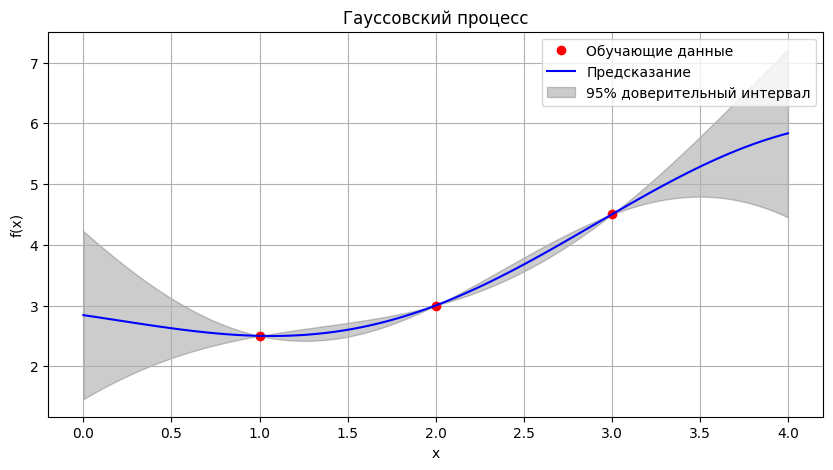

Предсказанное значение f(2.5): 3.6750736870999425 ± 0.058241127549647415


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Данные
X_train = np.array([[1], [2], [3]])
y_train = np.array([2.5, 3.0, 4.5])

# Определение ядра (RBF)
kernel = C(1.0, (1e-3, 1e3)) * RBF(1.0, (1e-2, 1e2))

# Создание модели Гауссовского процесса
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)

# Обучение модели
gp.fit(X_train, y_train)

# Новая точка для предсказания
X_test = np.array([[2.5]])
y_pred, sigma = gp.predict(X_test, return_std=True)

# Визуализация
X_plot = np.linspace(0, 4, 100).reshape(-1, 1)
y_plot, y_plot_std = gp.predict(X_plot, return_std=True)

plt.figure(figsize=(10, 5))
plt.plot(X_train, y_train, 'ro', label='Обучающие данные')
plt.plot(X_plot, y_plot, 'b-', label='Предсказание')
plt.fill_between(X_plot.ravel(), y_plot - 1.96 * y_plot_std, y_plot + 1.96 * y_plot_std,
                 alpha=0.2, color='k', label='95% доверительный интервал')
plt.title('Гауссовский процесс')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

print(f"Предсказанное значение f(2.5): {y_pred[0]} ± {sigma[0]}")


### Задача 2: Оптимизация гиперпараметров с использованием Гауссовского процесса


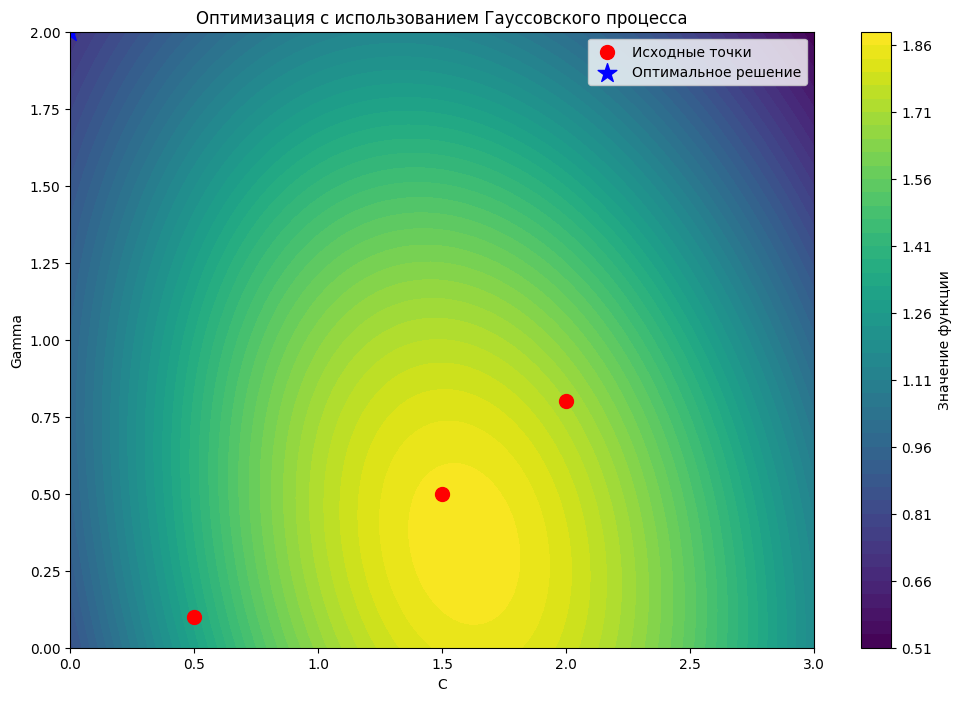

Оптимальные гиперпараметры: C = 0.0, gamma = 2.0, значение функции = 0.7229181452643334


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel as C, RBF

# Определение целевой функции
def target_function(C, gamma):
    noise = np.random.normal(0, 0.1)
    return np.sin(C) + np.cos(gamma) + noise

# Изначальные точки
initial_points = [(0.5, 0.1), (1.5, 0.5), (2.0, 0.8)]
X_train = np.array(initial_points)
y_train = np.array([target_function(C, gamma) for C, gamma in initial_points])

# Определение ядра
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))

# Создание модели Гауссовского процесса
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10)
gp.fit(X_train, y_train)

# Оптимизация
def min_func(X):
    return gp.predict(np.array([X]), return_std=False)[0]

# Начальные предположения для оптимизации
x0 = [1, 1]

# Оптимизация
res = minimize(min_func, x0, bounds=((0, 3), (0, 2)))

# Визуализация
x1 = np.linspace(0, 3, 100)
x2 = np.linspace(0, 2, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.array([min_func([x1, x2]) for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
Z = Z.reshape(X1.shape)

plt.figure(figsize=(12, 8))
plt.contourf(X1, X2, Z, levels=50, cmap='viridis')
plt.colorbar(label='Значение функции')
plt.scatter(X_train[:, 0], X_train[:, 1], c='red', s=100, label='Исходные точки')
plt.scatter(res.x[0], res.x[1], c='blue', s=200, marker='*', label='Оптимальное решение')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Оптимизация с использованием Гауссовского процесса')
plt.legend()
plt.show()

print(f"Оптимальные гиперпараметры: C = {res.x[0]}, gamma = {res.x[1]}, значение функции = {min_func(res.x)}")


### Задача 3: Сравнение различных функций ковариации


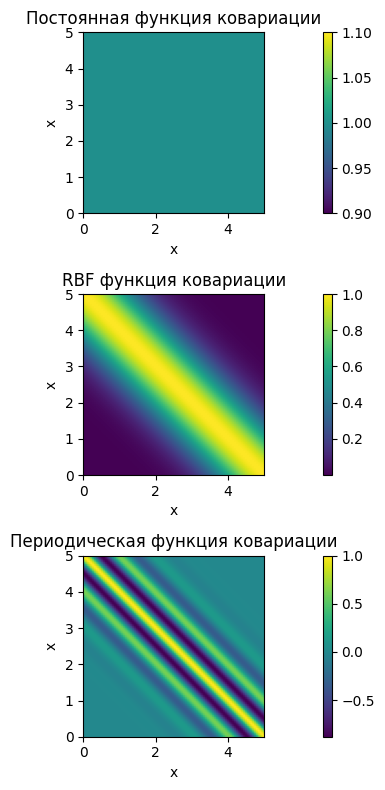

In [ ]:
# Определение функций ковариации
def constant_kernel(x_i, x_j):
    return np.ones_like(x_i)

def rbf_kernel(x_i, x_j, length_scale=1.0):
    return np.exp(-0.5 * ((x_i - x_j) ** 2) / length_scale ** 2)

def periodic_kernel(x_i, x_j, length_scale=1.0, period=1.0):
    return (np.exp(-0.5 * ((x_i - x_j) ** 2) / length_scale ** 2) *
            np.cos(2 * np.pi * (x_i - x_j) / period))

# Генерация x
x = np.linspace(0, 5, 100)

# Вычисление ковариаций
K_constant = constant_kernel(x[:, np.newaxis], x[np.newaxis, :])
K_rbf = rbf_kernel(x[:, np.newaxis], x[np.newaxis, :])
K_periodic = periodic_kernel(x[:, np.newaxis], x[np.newaxis, :])

# Визуализация
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Постоянная функция ковариации')
plt.imshow(K_constant, cmap='viridis', extent=(0, 5, 0, 5))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('x')

plt.subplot(3, 1, 2)
plt.title('RBF функция ковариации')
plt.imshow(K_rbf, cmap='viridis', extent=(0, 5, 0, 5))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('x')

plt.subplot(3, 1, 3)
plt.title('Периодическая функция ковариации')
plt.imshow(K_periodic, cmap='viridis', extent=(0, 5, 0, 5))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('x')

plt.tight_layout()
plt.show()



## Вопросы для самопроверки

1. Что такое Гауссовский процесс и какие основные его свойства?

2. Какова роль функции ковариации в Гауссовских процессах?

3. Объясните, как строится предсказание для Гауссовского процесса. Какова формула для математического ожидания?

4. Что такое байесовская оптимизация и как Гауссовские процессы используются в этом контексте?

5. В чем отличие Гауссовских процессов от линейной регрессии?

6. Какие функции ковариации могут использоваться в Гауссовских процессах и как они влияют на модель?

7. Как Гауссовские процессы справляются с неопределенностью в данных?

8. Объясните, что такое переобучение и как его можно избежать в Гауссовских процессах.

9. Каковы преимущества и недостатки использования Гауссовских процессов в практических задачах?

10. Как можно оптимизировать гиперпараметры с использованием Гауссовских процессов?

11. В чем заключается разница между эмпирическим распределением и предсказанным распределением в Гауссовском процессе?

12. Какие алгоритмы можно использовать для решения систем уравнений, возникающих в процессе предсказания?

13. Как влияет уровень шума на предсказания, сделанные Гауссовским процессом?

14. Какие реальные применения Гауссовских процессов вы можете привести из практики?

15. Как можно интерпретировать графики предсказаний и доверительных интервалов, полученных с помощью Гауссовского процесса?



## Задачи для самостоятельной работы

1. **Основы Гауссовских процессов**:
   - Определите, что такое Гауссовский процесс. Приведите примеры его применения.
   
2. **Функция ковариации**:
   - Выведите формулу для функции ковариации, использующей радиальную базисную функцию (RBF). Объясните физический смысл параметра $\ell$.

3. **Ковариационная матрица**:
   - Рассчитайте ковариационную матрицу $K$ для набора точек $x = [1, 2, 3]$ с использованием функции ковариации $k(x_i, x_j) = \exp(-\frac{(x_i - x_j)^2}{2})$.

4. **Обратная матрица**:
   - Найдите обратную матрицу ковариационной матрицы $K$, рассчитанной в предыдущем задании.

5. **Математическое ожидание**:
   - Найдите математическое ожидание для набора данных $y = [1, 2, 3]$ и объясните, как оно связано с Гауссовским процессом.

6. **Предсказание**:
   - Предскажите значение функции $f(x_*)$ для точки $x_* = 2.5$ с использованием обучающего набора $(x, y) = ([1, 2, 3], [2.5, 3.0, 4.5])$.

7. **Обработка неопределенности**:
   - Объясните, как Гауссовский процесс обрабатывает неопределенность предсказаний. Приведите примеры.

8. **Байесовская оптимизация**:
   - Опишите основные этапы байесовской оптимизации с использованием Гауссовских процессов. Приведите пример применения.

9. **Изменение гиперпараметров**:
   - Как изменение гиперпараметров влияет на структуру Гауссовского процесса? Приведите примеры.

10. **Функция потерь**:
    - Определите функцию потерь для гиперпараметров и объясните, как ее можно оптимизировать.

11. **Сравнение с другими методами**:
    - Сравните Гауссовские процессы с линейной регрессией. В чем их основные различия и преимущества?

12. **Гиперпараметрическая оптимизация**:
    - Опишите, как можно оптимизировать гиперпараметры модели SVM с помощью Гауссовских процессов.

13. **Сложные функции ковариации**:
    - Рассмотрите и объясните применение функции ковариации Матерна. Какие преимущества она имеет?

14. **Генерация данных**:
    - Сгенерируйте набор данных, используя Гауссовский процесс с заданной функцией ковариации и средним значением.

15. **Графическое представление**:
    - Постройте график, показывающий предсказания Гауссовского процесса для функции $f(x) = \sin(x)$ с добавлением случайного шума.

16. **Эффект шума**:
    - Исследуйте, как различный уровень шума $\sigma_n$ в модели влияет на предсказания Гауссовского процесса.

17. **Численные методы**:
    - Решите систему линейных уравнений, возникающую при предсказании с использованием Гауссовского процесса.

18. **Процедура обучения**:
    - Опишите пошаговую процедуру обучения Гауссовского процесса на наборе данных.

19. **Сравнение функций ковариации**:
    - Сравните три функции ковариации (постоянную, RBF и периодическую). В чем их отличия и применение?

20. **Эмпирическое распределение**:
    - Вычислите эмпирическое распределение для предсказанных значений функции на основе Гауссовского процесса.

21. **Гармоническая регрессия**:
    - Рассмотрите задачу гармонической регрессии с использованием Гауссовского процесса. Как выстроить модель?

22. **Проблема переобучения**:
    - Объясните, как Гауссовские процессы могут переобучаться и как этого избежать.

23. **Графики доверительных интервалов**:
    - Постройте график доверительных интервалов для предсказаний Гауссовского процесса.

24. **Эффективность вычислений**:
    - Оцените вычислительные затраты на построение модели Гауссовского процесса для большого числа данных.

25. **Адаптивные методы**:
    - Изучите адаптивные методы для оптимизации гиперпараметров с использованием Гауссовских процессов.

26. **Интерпретация результатов**:
    - Интерпретируйте результаты, полученные из Гауссовского процесса. Каковы основные выводы?

27. **Обучение без учителя**:
    - Как Гауссовские процессы могут применяться в задачах обучения без учителя?

28. **Применение в реальных задачах**:
    - Найдите пример применения Гауссовских процессов в реальной задаче и опишите его.

29. **Масштабирование моделей**:
    - Как можно масштабировать Гауссовские процессы для работы с большими наборами данных?

30. **Машинное обучение**:
    - Обсудите, как Гауссовские процессы могут быть использованы в машинном обучении для повышения точности моделей.